# Basic SKLearn Notebook using Linear Regression Analysis

#### Notebook template from Edx: Python for Data Science, UCSD, 2018
#### The data, European Soccer Database is from Kaggle

In [1]:
import sqlite3
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

### Here is a photo of a Women's National Team Player

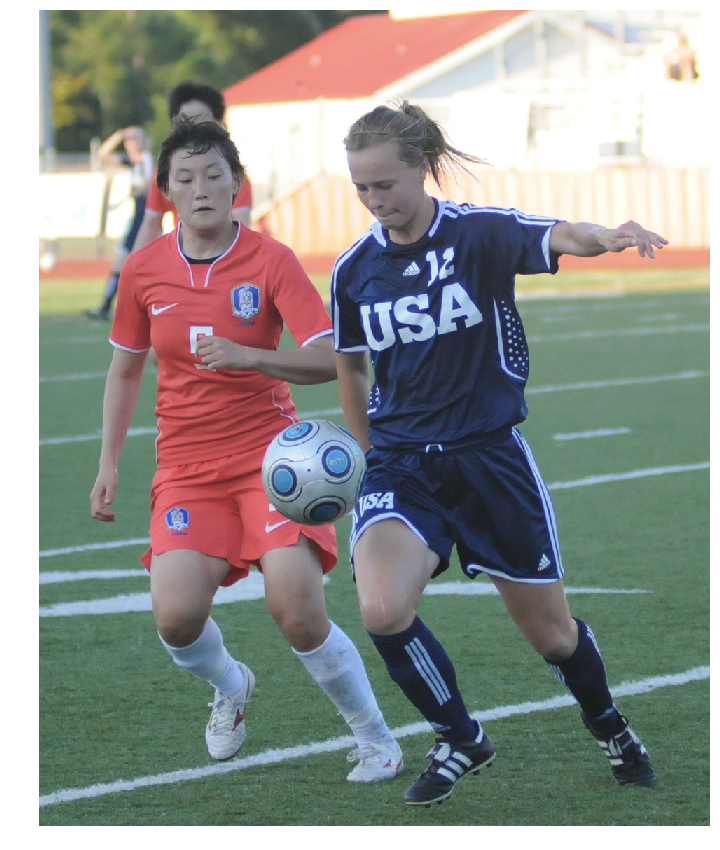

In [32]:
%matplotlib inline
import numpy as np
#from scipy import misc
import imageio
import matplotlib.pyplot as plt
from skimage import data

photo_soccer = imageio.imread('/Users/meganporter/OwnJupyterNotebooks/soccerphoto.jpg')
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(photo_soccer)

# photo from http://www.publicdomainfiles.com/show_file.php?id=13496551215742

In [3]:
read = sqlite3.connect('/Users/meganporter/EDXPy4DS/Week-7-MachineLearning/database 3.sqlite')
soccer_data = pd.read_sql_query("SELECT * FROM Player_Attributes", read)

In [4]:
soccer_data.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
soccer_data.shape

(183978, 42)

In [6]:
soccer_data.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

### Decide which column data to use for input features

In [7]:
input_features =  [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

### Define target variable

In [9]:
# Note that overall_rating is a column in our dataframe
target = ['overall_rating']

### Drop null values/clean data

In [10]:
soccer_data.dropna()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [11]:
soccer_data = soccer_data.dropna()
soccer_data.shape

(180354, 42)

### Define input and output variables

In [12]:
X = soccer_data[input_features]

In [13]:
y = soccer_data[target]

### Look at a typical row of data

In [14]:
soccer_data.iloc[5]

id                                       6
player_fifa_api_id                  189615
player_api_id                       155782
date                   2016-04-21 00:00:00
overall_rating                          74
potential                               76
preferred_foot                        left
attacking_work_rate                   high
defensive_work_rate                 medium
crossing                                80
finishing                               53
heading_accuracy                        58
short_passing                           71
volleys                                 40
dribbling                               73
curve                                   70
free_kick_accuracy                      69
long_passing                            68
ball_control                            71
acceleration                            79
sprint_speed                            78
agility                                 78
reactions                               67
balance    

In [15]:
y

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0
5,74.0
6,74.0
7,73.0
8,73.0
9,73.0


### Use basic SKLearn commands to split data into training data and testing data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

### Use regression commands to fit training data to a model

In [17]:
soccer_regressor = LinearRegression()
soccer_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Make a prediction

In [19]:
y_prediction = soccer_regressor.predict(X_test)
y_prediction

array([[66.51284879],
       [79.77234615],
       [66.57371825],
       ...,
       [69.23780133],
       [64.58351696],
       [73.6881185 ]])

### Get summary statistics

In [24]:
y_test.describe()

,overall_rating
count,59517.000000
mean,68.635818
std,7.041297
min,33.000000
25%,64.000000
50%,69.000000
75%,73.000000
max,94.000000


### Test accuracy using Root Mean Square Error

In [25]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

2.805303046855223


### Try the Decision Tree Regressor to compare to Linear Regression

In [26]:
soccer_regressor2 = DecisionTreeRegressor(max_depth=20)
soccer_regressor2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Make a new prediction

In [28]:
y_prediction = soccer_regressor2.predict(X_test)
y_prediction

array([62.        , 84.        , 62.38666667, ..., 71.        ,
       62.        , 73.        ])

### Look at the y_test data

In [29]:
y_test.describe()

,overall_rating
count,59517.000000
mean,68.635818
std,7.041297
min,33.000000
25%,64.000000
50%,69.000000
75%,73.000000
max,94.000000


### Compare RMSE of Linear Regression to Decision Tree Regression

In [30]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

1.4643911659606463
